## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings as w
w.filterwarnings('ignore')
%matplotlib inline


In [3]:
pd.set_option("display.max_columns", None)
pd.set_option("max_colwidth", None)

## Reading the data

In [6]:
df = pd.read_csv(r"C:\Users\ds12\ML Assign\Data Sets\MLK\cleantel.csv")


In [7]:
df.head()


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,gender_Male,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,29.85,29.85,0,0,1,0,0
1,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,56.95,1889.50,1,0,0,1,0
2,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,53.85,108.15,1,0,0,1,1
3,0,0,0,45,0,0,1,1,0,1,1,0,0,1,0,42.30,1840.75,1,0,0,0,0
4,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,70.70,151.65,0,0,1,0,1


In [8]:
# Getting feature name who have unqiue values greater than 5

col_list = df.nunique()[df.nunique() > 5].index.tolist()
col_list


['tenure', 'MonthlyCharges', 'TotalCharges']

tenure


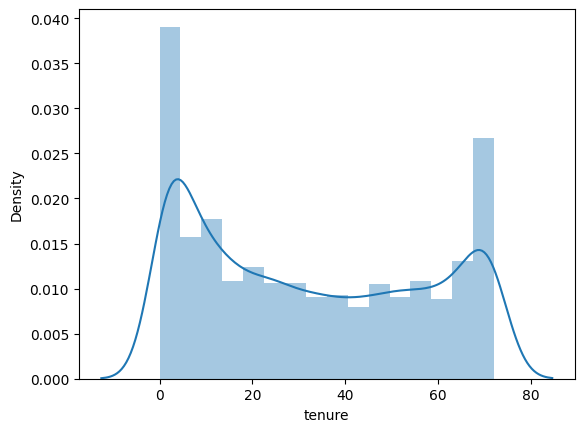

MonthlyCharges


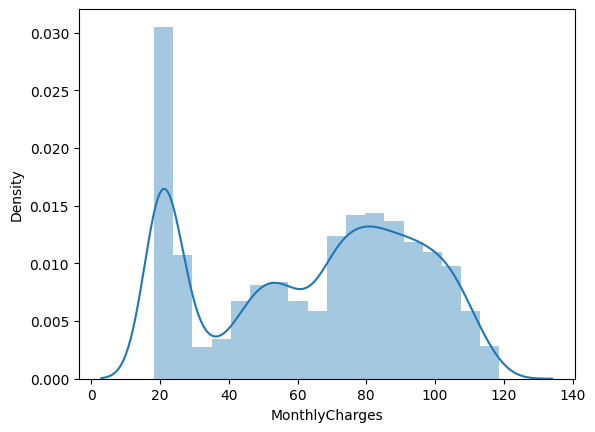

TotalCharges


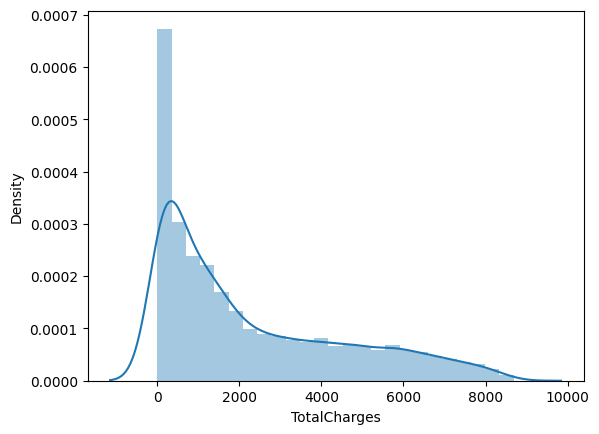

In [9]:
# Plotting Distribution of the features
for i in col_list:
    print(i)
    sns.distplot(df[i])
    plt.show()

In [10]:
# Split data into features and target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [26]:
# Importing the Machine Learning , Metrics and Preprocessing Libraries

# Libraries for Data Splitting and Preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Import Machine Learning models

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Importing Metrics for Model Evaluation
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    precision_score,
    recall_score,
    f1_score,
)


In [12]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scaling the data
scaler = MinMaxScaler()
#  Scaling the col_list columns
X_train[col_list] = scaler.fit_transform(X_train[col_list])
X_test[col_list] = scaler.transform(X_test[col_list])


In [27]:
# Creating Decision Tree instance
dt = DecisionTreeClassifier(random_state=42)

In [28]:
# Create a forward SequentialFeatureSelector to select features
from sklearn.feature_selection import SequentialFeatureSelector

sfs = SequentialFeatureSelector(
    estimator=dt, direction="forward", n_features_to_select=12, cv=10, n_jobs=-1
)

# Fit SFS to the training data
sfs.fit(X_train, y_train)

# Get the selected feature indices
selected_indicesf = list(sfs.get_feature_names_out())
print(selected_indicesf)


['Partner', 'Dependents', 'tenure', 'PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'TechSupport', 'StreamingTV', 'Contract', 'PaperlessBilling', 'PaymentMethod_Mailed check']


In [29]:
# Create a backward SequentialFeatureSelector to select features

sfs = SequentialFeatureSelector(
    estimator=dt, direction="backward", n_features_to_select=12, cv=10, n_jobs=-1
)

# Fit SFS to the training data
sfs.fit(X_train, y_train)

# Get the selected feature indices
selected_indicesb = list(sfs.get_feature_names_out())
print(selected_indicesb)


['Dependents', 'tenure', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'StreamingTV', 'Contract', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'PaymentMethod_Electronic check']


In [30]:
indices = list(set(selected_indicesf).union(set(selected_indicesb)))


In [31]:
indices


['PhoneService',
 'Dependents',
 'InternetService',
 'Partner',
 'PaymentMethod_Electronic check',
 'TotalCharges',
 'PaymentMethod_Mailed check',
 'Contract',
 'OnlineSecurity',
 'MultipleLines',
 'tenure',
 'PaperlessBilling',
 'StreamingTV',
 'OnlineBackup',
 'MonthlyCharges',
 'TechSupport']

# With Selected Indices from SequentialFeatureSelector

In [35]:
# Creating a list of tuples for the model names and the models
models = [
    ("Logistic Regression", LogisticRegression()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("SVM", SVC()),
    ("XGBoost", XGBClassifier()),
    ("CatBoost", CatBoostClassifier(verbose=0)),
]

In [36]:
# Creating a dataframe to store the results
results = pd.DataFrame(
    columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC Score"]
)
for model_name, model in models:
    model.fit(X_train.loc[:, indices], y_train)
    y_pred = model.predict(X_test.loc[:, indices])
    results = results.append(
        {
            "Model": model_name,
            "Accuracy": accuracy_score(y_test, y_pred),
            "Precision": precision_score(y_test, y_pred),
            "Recall": recall_score(y_test, y_pred),
            "F1 Score": f1_score(y_test, y_pred),
            "ROC AUC Score": roc_auc_score(y_test, y_pred),
        },
        ignore_index=True,
    )

# Printing the results
results.sort_values(by="ROC AUC Score", ascending=False)

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC Score
0,Logistic Regression,0.798439,0.639752,0.550802,0.591954,0.719362
5,CatBoost,0.804116,0.667808,0.521390,0.585586,0.713835
3,SVM,0.799148,0.658537,0.505348,0.571861,0.705331
2,Random Forest,0.787083,0.621711,0.505348,0.557522,0.697118
4,XGBoost,0.785664,0.620000,0.497326,0.551929,0.693591
1,Decision Tree,0.719659,0.473684,0.505348,0.489004,0.651225


# Modeling With All Features

In [37]:
# Creating a dataframe to store the results
results = pd.DataFrame(
    columns=["Model", "Accuracy", "Precision",
             "Recall", "F1 Score", "ROC AUC Score"]
)
for model_name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results = results.append(
        {
            "Model": model_name,
            "Accuracy": accuracy_score(y_test, y_pred),
            "Precision": precision_score(y_test, y_pred),
            "Recall": recall_score(y_test, y_pred),
            "F1 Score": f1_score(y_test, y_pred),
            "ROC AUC Score": roc_auc_score(y_test, y_pred),
        },
        ignore_index=True,
    )

# Printing the results
results.sort_values(by="ROC AUC Score", ascending=False)


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC Score
0,Logistic Regression,0.802697,0.652866,0.548128,0.595930,0.721407
4,XGBoost,0.789922,0.625000,0.521390,0.568513,0.704173
5,CatBoost,0.794180,0.640940,0.510695,0.568452,0.703657
3,SVM,0.792051,0.635452,0.508021,0.564636,0.701354
2,Random Forest,0.790632,0.632997,0.502674,0.560358,0.698680
1,Decision Tree,0.730305,0.492386,0.518717,0.505208,0.662740


# OverSampling DataSet

In [38]:
# Oversampling the data using SMOTE
from imblearn.over_sampling import SMOTE

# Creating SMOTE instance
os = SMOTE()
# Fitting the data
X_R, y_R = os.fit_resample(X, y)

# Splitting Oversampled data into train and test
XR_train, XR_test, yR_train, yR_test = train_test_split(
    X_R, y_R, test_size=0.3, random_state=42
)


In [39]:
# Scaling the oversampled data
XR_train[col_list] = scaler.fit_transform(XR_train[col_list])
XR_test[col_list] = scaler.transform(XR_test[col_list])

In [45]:
# Creating a dataframe to store the results
results = pd.DataFrame(
    columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC Score"]
)
for model_name, model in models:
    model.fit(XR_train.loc[:, indices], yR_train)
    y_pred = model.predict(XR_test.loc[:, indices])
    results = results.append(
        {
            "Model": model_name,
            "Accuracy": accuracy_score(yR_test, y_pred),
            "Precision": precision_score(yR_test, y_pred),
            "Recall": recall_score(yR_test, y_pred),
            "F1 Score": f1_score(yR_test, y_pred),
            "ROC AUC Score": roc_auc_score(yR_test, y_pred),
        },
        ignore_index=True,
    )

# Printing the results
results.sort_values(by="ROC AUC Score", ascending=False)

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC Score
5,CatBoost,0.838003,0.812272,0.873285,0.841675,0.838485
2,Random Forest,0.833172,0.821996,0.844546,0.833119,0.833328
4,XGBoost,0.829630,0.811955,0.851731,0.831368,0.829932
0,Logistic Regression,0.823833,0.795318,0.865447,0.828902,0.824401
3,SVM,0.814815,0.807990,0.819073,0.813493,0.814873
1,Decision Tree,0.773913,0.772877,0.766819,0.769836,0.773816


## Training Model with OverSampled Data with All Features

In [46]:
# Creating a dataframe to store the results
results = pd.DataFrame(
    columns=["Model", "Accuracy", "Precision",
             "Recall", "F1 Score", "ROC AUC Score"]
)
for model_name, model in models:
    model.fit(XR_train, yR_train)
    y_pred = model.predict(XR_test)
    results = results.append(
        {
            "Model": model_name,
            "Accuracy": accuracy_score(yR_test, y_pred),
            "Precision": precision_score(yR_test, y_pred),
            "Recall": recall_score(yR_test, y_pred),
            "F1 Score": f1_score(yR_test, y_pred),
            "ROC AUC Score": roc_auc_score(yR_test, y_pred),
        },
        ignore_index=True,
    )

# Printing the results
results.sort_values(by="ROC AUC Score", ascending=False)


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC Score
2,Random Forest,0.849275,0.846254,0.848465,0.847358,0.849264
5,CatBoost,0.848631,0.833019,0.866754,0.849552,0.848879
4,XGBoost,0.841224,0.830153,0.852384,0.841121,0.841376
3,SVM,0.834783,0.827542,0.839974,0.833712,0.834854
0,Logistic Regression,0.833816,0.812693,0.861528,0.836398,0.834195
1,Decision Tree,0.784541,0.778424,0.787067,0.782722,0.784576
